In [33]:
import numpy as np
import pandas as pd
import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#given
r_rotor = 0.3048*30 #m
V_tip = 650*0.3048 #m/s
chord = 2*0.3048 #m
rho = 1.2256 #kg/m3
cl_alpha = 2*np.pi
omega = V_tip/r_rotor #rad/s
theta_75 = 0.05 #rad
N_b= 3


In [73]:
r = sp.symbols('r', real=True)

def Thrust(N_b,theta_75,r_rotor,chord, rho, cl_alpha,omega):

    sigma = ((N_b*chord)/(np.pi*r))
    lambda_r = (N_b*chord*cl_alpha*((1+(24*np.pi*r*theta_75)/(N_b*chord*cl_alpha))**(0.5)-1))/(16*np.pi*r)
    d_CT = 4*r*lambda_r**2
    d_CP_i = 4*r*lambda_r**3
    d_T_r = rho*2*np.pi*r*((omega*r)**2)*d_CT
    d_T_r1 = rho*2*np.pi*r*((r/2)*(omega)**2)*d_CT
    
#your lower bound is 2 to accomodate blade attachments and pitch change mechanisms
    CT_r = integrate(nsimplify(d_CT,(r, 0.2,r)))

    T_r = CT_r*rho*(np.pi*r**2)*(omega*r)**2
    T_total = T_r.subs([(r,r_rotor)])
    CT_total = CT_r.subs([(r,1)])

#power for ideal twist

    c_d0 = 0.011
    d_1 = 0.02
    d_2 = 0.4
    CP_r = sigma*(c_d0/8)+(2*d_1*CT_r/(3*cl_alpha))+((4*d_2*CT_r**2)/(sigma*cl_alpha**2))
    CP_total = CP_r.subs([(r,1)])
    
#disk rotor
    k=0.3
    CT_disk = float(T_total/(rho*(np.pi*r_rotor**2)*(omega*r_rotor)**2))
    CP_disk = float((((N_b*chord)/(np.pi*r_rotor))*c_d0/8)+(k*(CT_disk**(1.5))/(2**0.5)))
    
    return T_r, T_total, CT_r, CT_total, CP_r, CP_total, CT_disk, CP_disk

In [69]:
T_r_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[0]
T_total_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[1]

T_r_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[0]
T_total_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[1]

T_r_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[0]
T_total_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[1]

T_r_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[0]
T_total_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[1]

In [62]:
CT_r_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[2]
CT_total_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[3]

CT_r_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[2]
CT_total_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[3]

CT_r_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[2]
CT_total_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[3]

CT_r_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[2]
CT_total_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[3]

In [65]:
#trying out CP for different theta75 angles for 3 blades

CP_r_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[5]

In [45]:
#trying out CP for different solidities for theta75=0.1

CP_r_3 = Thrust(3,0.10,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_3 = Thrust(3,0.10,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_4 = Thrust(4,0.10,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_4 = Thrust(4,0.10,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_5 = Thrust(5,0.10,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_5 = Thrust(5,0.10,r_rotor,chord,rho,cl_alpha,omega)[5]

CP_r_2 = Thrust(2,0.10,r_rotor,chord,rho,cl_alpha,omega)[4]
CP_total_2 = Thrust(2,0.10,r_rotor,chord,rho,cl_alpha,omega)[5]

In [76]:

CT_disk_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[6]
CT_disk_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[6]
CT_disk_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[6]
CT_disk_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[6]


CP_disk_015 = Thrust(N_b,0.15,r_rotor,chord,rho,cl_alpha,omega)[7]
CP_disk_005 = Thrust(N_b,0.05,r_rotor,chord,rho,cl_alpha,omega)[7]
CP_disk_010 = Thrust(N_b,0.10,r_rotor,chord,rho,cl_alpha,omega)[7]
CP_disk_020 = Thrust(N_b,0.20,r_rotor,chord,rho,cl_alpha,omega)[7]


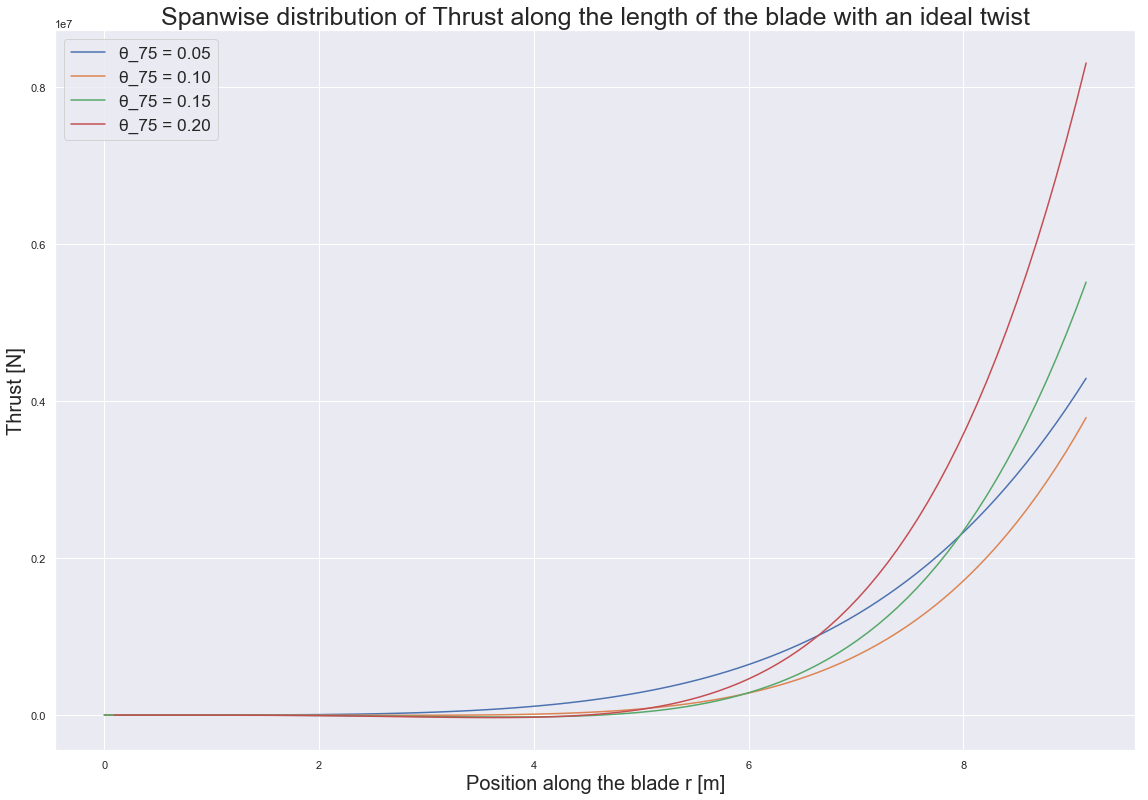

In [104]:
r = sp.symbols('r', real=True)
rs = np.linspace(0,r_rotor,100)
T_rs_005 = []
T_rs_010 = []
T_rs_015 = []
T_rs_020 = []
for i in rs:
    T_rs_005.append(float(T_r_005.subs([(r,i)])))
    T_rs_010.append(float(T_r_010.subs([(r,i)])))
    T_rs_015.append(float(T_r_015.subs([(r,i)])))
    T_rs_020.append(float(T_r_020.subs([(r,i)])))
    
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p1 = sns.lineplot(rs,T_rs_005,label="θ_75 = 0.05")
p1 = sns.lineplot(rs,T_rs_010,label="θ_75 = 0.10")
p1 = sns.lineplot(rs,T_rs_015,label="θ_75 = 0.15")
p1 = sns.lineplot(rs,T_rs_020,label="θ_75 = 0.20")
#plotting 
# p1 = sns.lineplot(vis_df_3.iloc[:, 0],3.28084*v_h,label="v_h")
p1.set_ylabel('Thrust [N]', fontsize = 20)
p1.set_xlabel('Position along the blade r [m]', fontsize = 20)
p1.set_title('Spanwise distribution of Thrust along the length of the blade with an ideal twist', fontsize = 25)
p1.legend(fontsize='x-large')


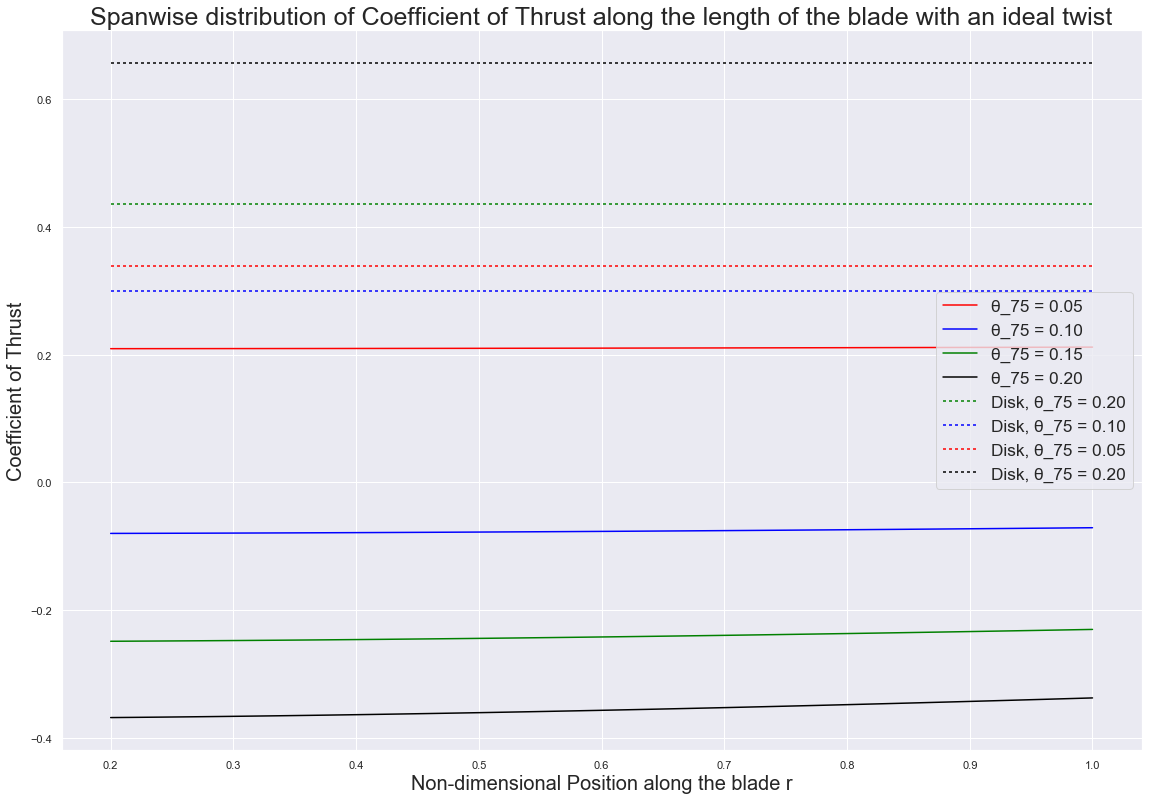

In [101]:
#non dimensional version
r = sp.symbols('r', real=True)
rs = np.linspace(0.2,1,100)
CT_rs_005 = []
CT_rs_010 = []
CT_rs_015 = []
CT_rs_020 = []
for i in rs:
    CT_rs_005.append(float(CT_r_005.subs([(r,i)])))
    CT_rs_010.append(float(CT_r_010.subs([(r,i)])))
    CT_rs_015.append(float(CT_r_015.subs([(r,i)])))
    CT_rs_020.append(float(CT_r_020.subs([(r,i)])))
    
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p2 = sns.lineplot(rs,CT_rs_005,label="θ_75 = 0.05",color='red')
p2 = sns.lineplot(rs,CT_rs_010,label="θ_75 = 0.10",color='blue')
p2 = sns.lineplot(rs,CT_rs_015,label="θ_75 = 0.15",color='green')
p2 = sns.lineplot(rs,CT_rs_020,label="θ_75 = 0.20",color='black')
p2 = sns.lineplot(rs,CT_disk_015,color='green',style=True,legend=False, label="Disk, θ_75 = 0.20",dashes=[(2,2)])
p2 = sns.lineplot(rs,CT_disk_010,color='blue',style=True,legend=False, label="Disk, θ_75 = 0.10",dashes=[(2,2)])
p2 = sns.lineplot(rs,CT_disk_005,color='red',style=True,legend=False, label="Disk, θ_75 = 0.05",dashes=[(2,2)])
p2 = sns.lineplot(rs,CT_disk_020,color='black',style=True,legend=False, label="Disk, θ_75 = 0.20",dashes=[(2,2)])
#plotting 

p2.set_ylabel('Coefficient of Thrust', fontsize = 20)
p2.set_xlabel('Non-dimensional Position along the blade r', fontsize = 20)
p2.set_title('Spanwise distribution of Coefficient of Thrust along the length of the blade with an ideal twist', fontsize = 25)
p2.legend(fontsize='x-large')


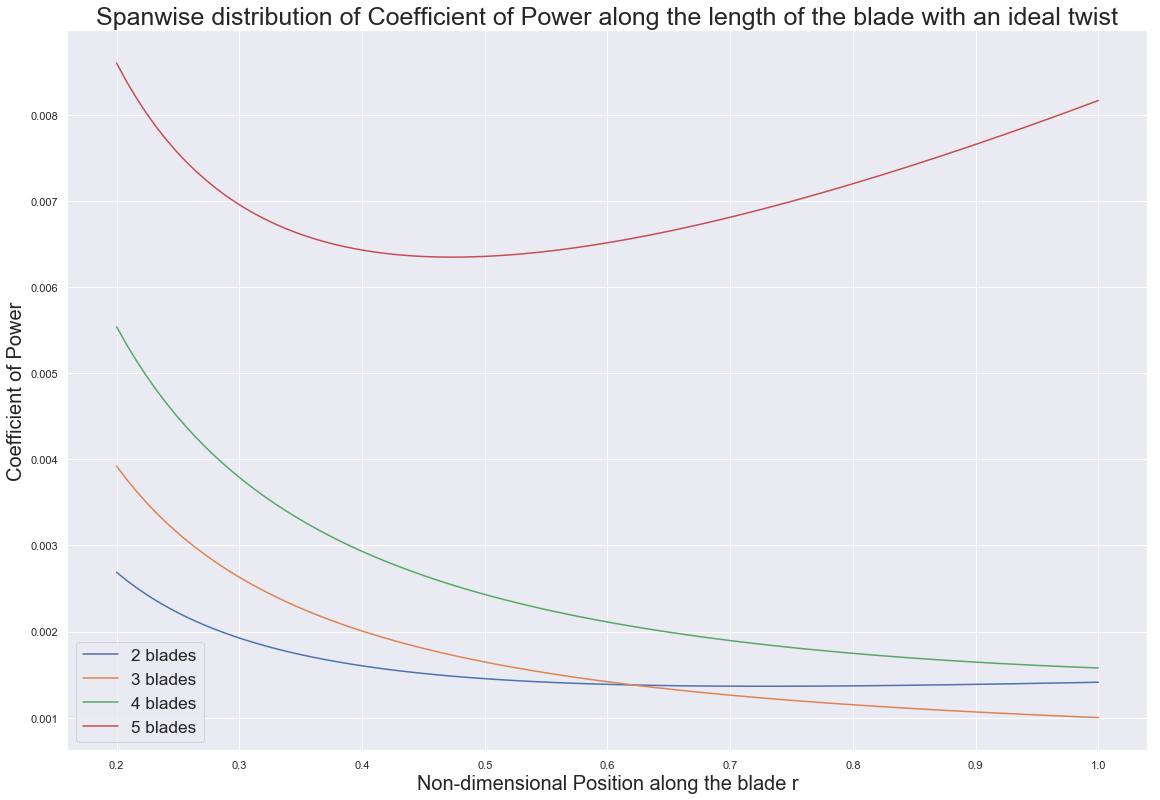

In [64]:
#non dimensional version
rs = np.linspace(0.2,1,100)
CP_rs_2 = []
CP_rs_3 = []
CP_rs_4 = []
CP_rs_5 = []
for i in rs:
    CP_rs_2.append(float(CP_r_2.subs([(r,i)])))
    CP_rs_3.append(float(CP_r_3.subs([(r,i)])))
    CP_rs_4.append(float(CP_r_4.subs([(r,i)])))
    CP_rs_5.append(float(CP_r_5.subs([(r,i)])))
    
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p3 = sns.lineplot(rs,CP_rs_2,label="2 blades")
p3 = sns.lineplot(rs,CP_rs_3,label="3 blades")
p3 = sns.lineplot(rs,CP_rs_4,label="4 blades")
p3 = sns.lineplot(rs,CP_rs_5,label="5 blades")

#plotting 

p3.set_ylabel('Coefficient of Power', fontsize = 20)
p3.set_xlabel('Non-dimensional Position along the blade r', fontsize = 20)
p3.set_title('Spanwise distribution of Coefficient of Power along the length of the blade with an ideal twist', fontsize = 25)
p3.legend(fontsize='x-large')


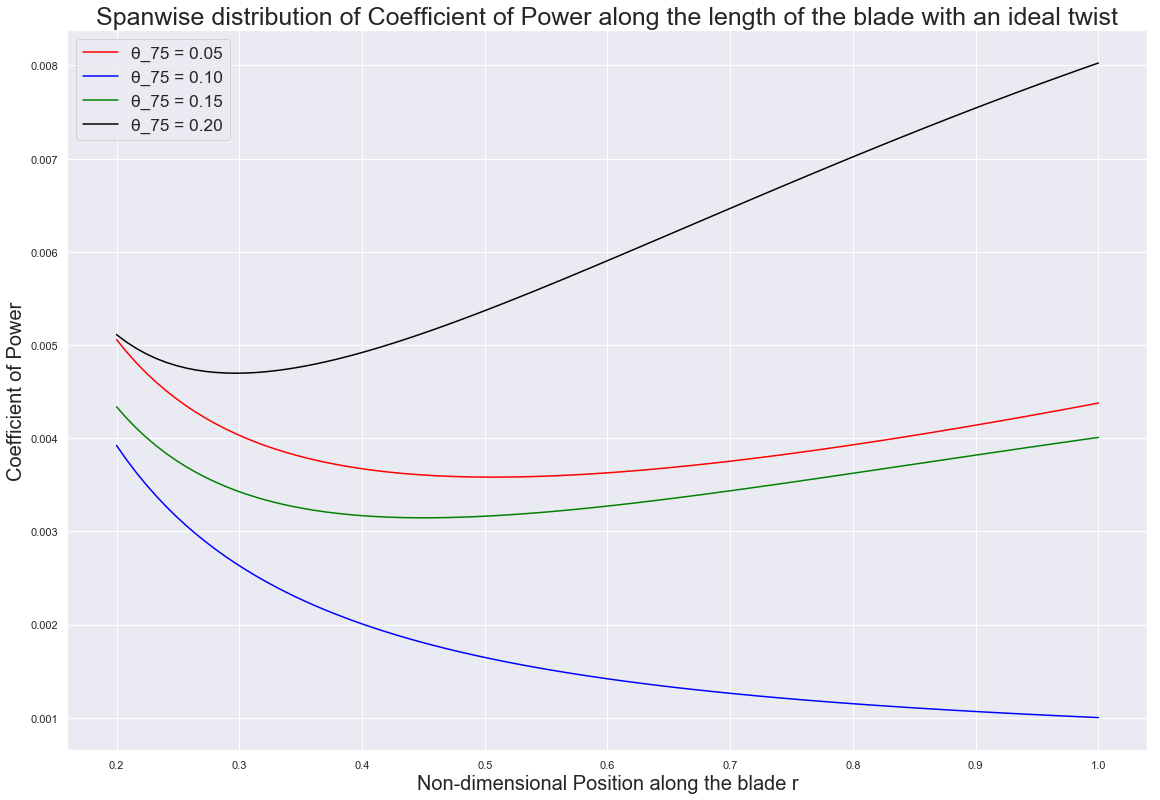

In [105]:
#Coefficient of Power by varying theta75
rs = np.linspace(0.2,1,100)
CP_rs_005 = []
CP_rs_010 = []
CP_rs_015 = []
CP_rs_020 = []
for i in rs:
    CP_rs_005.append(float(CP_r_005.subs([(r,i)])))
    CP_rs_010.append(float(CP_r_010.subs([(r,i)])))
    CP_rs_015.append(float(CP_r_015.subs([(r,i)])))
    CP_rs_020.append(float(CP_r_020.subs([(r,i)])))
    
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p4 = sns.lineplot(rs,CP_rs_005,label="θ_75 = 0.05",color='red')
p4 = sns.lineplot(rs,CP_rs_010,label="θ_75 = 0.10",color='blue')
p4 = sns.lineplot(rs,CP_rs_015,label="θ_75 = 0.15",color='green')
p4 = sns.lineplot(rs,CP_rs_020,label="θ_75 = 0.20",color='black')

# p4 = sns.lineplot(rs,CP_disk_005,color='red',style=True,legend=False, label="Disk, theta = 0.05",dashes=[(2,2)])
# p4 = sns.lineplot(rs,CP_disk_010,color='blue',style=True,legend=False, label="Disk, theta = 0.10",dashes=[(2,2)])
# p4 = sns.lineplot(rs,CP_disk_015,color='green',style=True,legend=False, label="Disk, theta = 0.20",dashes=[(2,2)])
# p4 = sns.lineplot(rs,CP_disk_020,color='black',style=True,legend=False, label="Disk, theta = 0.20",dashes=[(2,2)])
#plotting 

p4.set_ylabel('Coefficient of Power', fontsize = 20)
p4.set_xlabel('Non-dimensional Position along the blade r', fontsize = 20)
p4.set_title('Spanwise distribution of Coefficient of Power along the length of the blade with an ideal twist', fontsize = 25)
p4.legend(fontsize='x-large')


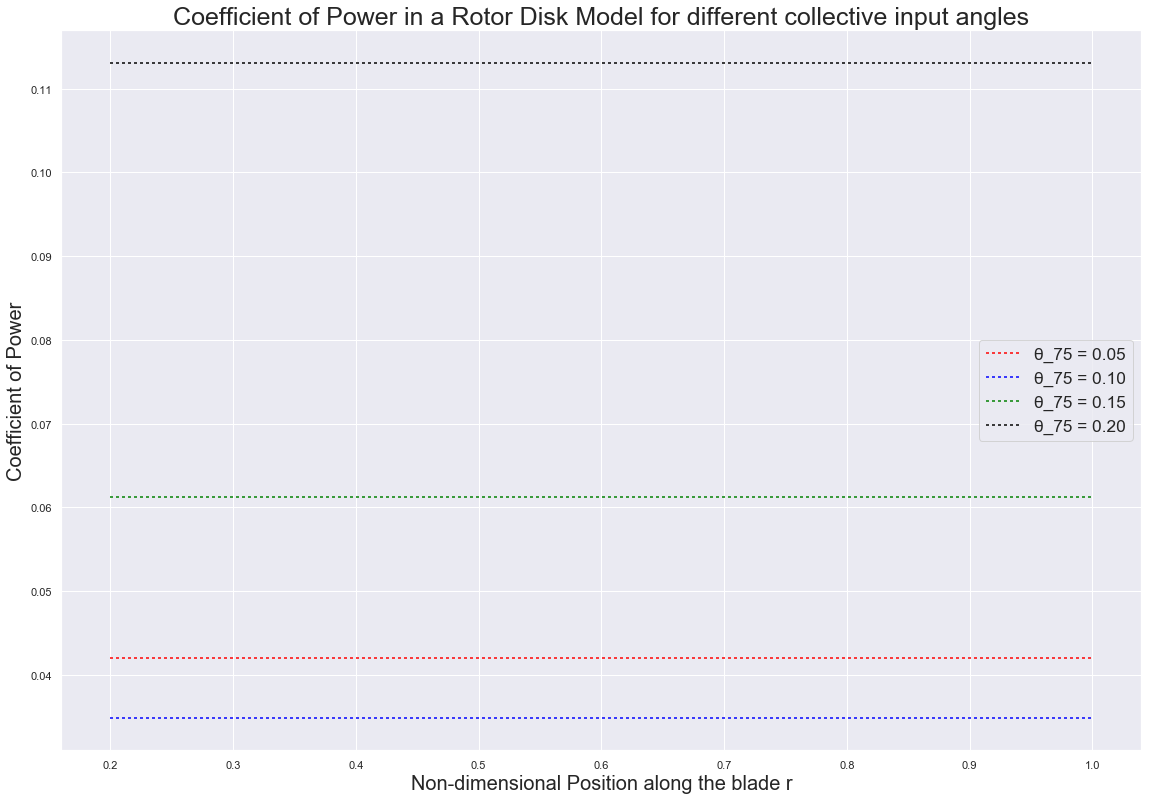

In [107]:
rs = np.linspace(0.2,1,100)

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

p5 = sns.lineplot(rs,CP_disk_005,color='red',style=True,legend=False, label="θ_75 = 0.05",dashes=[(2,2)])
p5 = sns.lineplot(rs,CP_disk_010,color='blue',style=True,legend=False, label="θ_75 = 0.10",dashes=[(2,2)])
p5 = sns.lineplot(rs,CP_disk_015,color='green',style=True,legend=False, label="θ_75 = 0.15",dashes=[(2,2)])
p5 = sns.lineplot(rs,CP_disk_020,color='black',style=True,legend=False, label="θ_75 = 0.20",dashes=[(2,2)])
#plotting 

p5.set_ylabel('Coefficient of Power', fontsize = 20)
p5.set_xlabel('Non-dimensional Position along the blade r', fontsize = 20)
p5.set_title('Coefficient of Power in a Rotor Disk Model for different collective input angles', fontsize = 25)
p5.legend(fontsize='x-large')


In [117]:
df_total = pd.DataFrame(
    {'CT total': [float(CT_total_005),float(CT_total_010),float(CT_total_015),float(CT_total_020)],
     'CP total': [float(CP_total_005),float(CP_total_010),float(CP_total_015),float(CP_total_020)]
    }).set_index([pd.Index([0.05, 0.10, 0.15, 0.2])])

In [118]:
df_total

,CT total,CP total
0.05,0.211903,0.004376
0.10,-0.071074,0.001001
0.15,-0.230416,0.004008
0.20,-0.337750,0.008026
